In [11]:
# Importing Dependencies and Setup
# We don't know what we need, so we'll import a bunch of different modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import random as random
from scipy.stats import linregress


In [12]:
# Load CSV file and turn it into PD DataFrames
goOne_df = pd.read_csv("Resources/goemotions_1.csv")
goTwo_df = pd.read_csv("Resources/goemotions_2.csv")
goThree_df = pd.read_csv("Resources/goemotions_3.csv")

In [13]:
# Merge the three separate DataFrames into one.
dfMerge = goOne_df.merge(goTwo_df, how='outer')
dfMerge = dfMerge.merge(goThree_df, how='outer')

# Convert column into DateTime datatype, and apply the correct unit (seconds) to turn it readable.
dfMerge['created_utc'] = dfMerge['created_utc'].astype('datetime64[s]')
dfMerge

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,2019-01-25 01:50:39,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,2019-01-21 15:22:49,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,2019-01-02 11:15:44,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,2019-01-20 06:17:34,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,2019-01-05 06:10:01,2,False,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211220,Everyone likes [NAME].,ee6pagw,Senshado,heroesofthestorm,t3_agjf24,t3_agjf24,2019-01-16 10:25:22,16,False,0,...,1,0,0,0,0,0,0,0,0,0
211221,Well when you’ve imported about a gazillion of...,ef28nod,5inchloser,nottheonion,t3_ak26t3,t3_ak26t3,2019-01-27 01:39:42,15,False,0,...,0,0,0,0,0,0,0,0,0,0
211222,That looks amazing,ee8hse1,springt1me,shittyfoodporn,t3_agrnqb,t3_agrnqb,2019-01-17 00:08:54,70,False,1,...,0,0,0,0,0,0,0,0,0,0
211223,The FDA has plenty to criticize. But like here...,edrhoxh,enamedata,medicine,t3_aejqzd,t1_edrgdtx,2019-01-11 01:07:12,4,False,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Clean DataFrame by: 1.# Dropping columns, 2.) Choosing "Clear" selections, 3.) Dropping the "example_very_unclear" column after selection
dfStaging = dfMerge.drop(columns=['id', 'author', 'link_id', 'parent_id'])
dfStagingA = dfStaging.loc[(dfStaging['example_very_unclear'] == False)]
dfClean = dfStagingA.drop(columns=['example_very_unclear'])
dfClean
# dfClean will have "clear" examples

,text,subreddit,created_utc,rater_id,admiration,amusement,anger,annoyance,approval,caring,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,nrl,2019-01-25 01:50:39,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,"You do right, if you don't care then fuck 'em!",confessions,2019-01-02 11:15:44,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,facepalm,2019-01-20 06:17:34,18,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",starwarsspeculation,2019-01-05 06:10:01,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,Right? Considering it’s such an important docu...,TrueReddit,2019-01-23 21:50:08,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,"Well, I'm glad you're out of all that now. How...",raisedbynarcissists,2019-01-04 15:22:34,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211220,Everyone likes [NAME].,heroesofthestorm,2019-01-16 10:25:22,16,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
211221,Well when you’ve imported about a gazillion of...,nottheonion,2019-01-27 01:39:42,15,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
211222,That looks amazing,shittyfoodporn,2019-01-17 00:08:54,70,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Clean DataFrame by: 1.# Dropping columns, 2.) Choosing "Unclear" selections, 3.) Dropping the "example_very_unclear" column after selection
# Same as above; 
dfStagingB = dfStaging.loc[(dfStaging['example_very_unclear'] == True)]
dfEVUClean = dfStagingB.drop(columns=['example_very_unclear'])
dfEVUClean
# dfEVUClean will have "unclear" examples

,text,subreddit,created_utc,rater_id,admiration,amusement,anger,annoyance,approval,caring,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
1,>sexuality shouldn’t be a grouping category I...,unpopularopinion,2019-01-21 15:22:49,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,Oi us cancers don’t want him either! We respec...,Justfuckmyshitup,2019-01-13 22:13:56,22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,I unfortunately can not afford a lawyer. Lucki...,Divorce,2019-01-01 17:28:15,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,OMG THOSE TINY SHOES! *desire to boop snoot in...,chicago,2019-01-20 05:36:33,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
264,I would pay money for [NAME] to not be my nurs...,SoulCalibur,2019-01-17 03:50:29,22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211037,_____ is ruining _____ because kids these days.,moviescirclejerk,2019-01-10 23:51:59,57,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211082,"yea I agree, and [NAME] is way younger so has ...",Dodgers,2019-01-04 22:09:22,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211113,"Huh, assumed he was more of a grindr fella .....",90dayfianceuncensored,2019-01-30 23:05:53,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211214,Well when you’ve imported about a gazillion of...,nottheonion,2019-01-27 01:39:42,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
dfEVUTrue = dfMerge.loc[dfMerge['example_very_unclear'] == True]

In [17]:
subS = goOne_df.pivot_table(index = ['subreddit'], aggfunc ='size')
subS.sort_values(inplace=True)
subS

subreddit
farcry               26
canes                37
Anticonsumption      39
OttawaSenators       44
TeamSolomid          48
                   ... 
AnimalsBeingBros    277
loveafterlockup     281
timberwolves        292
socialanxiety       303
cringe              319
Length: 483, dtype: int64

In [18]:
sub_G1 = goOne_df.loc[(goOne_df['subreddit'] == 'AnimalsBeingBros') | (goOne_df['subreddit'] == 'cringe') | (goOne_df['subreddit'] == 'socialanxiety') & (goOne_df['example_very_unclear'] == True), :]
sub_G1.drop(columns=['author', 'id', 'link_id', 'parent_id', 'created_utc', 'example_very_unclear'])

,text,subreddit,rater_id,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
6,"He isn't as big, but he's still quite popular....",cringe,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,"Something Something Something, space of aids",cringe,19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59,Gotta protect’em!,AnimalsBeingBros,34,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
383,NO MAN LEFT BEHIND,AnimalsBeingBros,55,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
557,Yeah it doesn't impact much except when they b...,cringe,56,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69307,Oh boy... it must actually be kind of nice to ...,cringe,66,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
69495,Wonder where all the shit is.,AnimalsBeingBros,67,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
69602,Oh cool another manufactured awful [NAME] push...,cringe,46,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69669,"""one of us will be right!"" Or...ya both wrong ...",cringe,39,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
sub_ABB = sub_G1.loc[(sub_G1['subreddit'] == 'AnimalsBeingBros')]
sub_ABB.drop(columns=['author', 'id', 'link_id', 'parent_id', 'created_utc', 'example_very_unclear', 'rater_id'], inplace=True)
sub_ABB.reset_index(inplace=True, drop=True)
ABBad = sub_ABB.admiration()
ABB = len(sub_ABB.index)
print(f"AnimalsBeingBros has {ABB} comments and {ABBad} admirations")

f:\Users\18049\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


TypeError: 'Series' object is not callable

In [ ]:
sub_ABB

,text,subreddit,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,Gotta protect’em!,AnimalsBeingBros,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NO MAN LEFT BEHIND,AnimalsBeingBros,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,It’s possible that the dog just escaped. Espec...,AnimalsBeingBros,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,They r playing,AnimalsBeingBros,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,I recently learned that cats lick to show domi...,AnimalsBeingBros,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,That dog actually looks flatter too.,AnimalsBeingBros,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
273,Just being friendly and sociable for the famil...,AnimalsBeingBros,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
274,"That's crazy, my brother's cat did the same th...",AnimalsBeingBros,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,Technology is amazing. Now we can SEE how new ...,AnimalsBeingBros,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
sub_Cri = sub_G1.loc[(sub_G1['subreddit'] == 'cringe')]
sub_Cri.drop(columns=['author', 'id', 'link_id', 'parent_id', 'created_utc', 'example_very_unclear', 'rater_id']).reset_index(inplace=True, drop=True)
sub_ABB

,text,subreddit,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,Gotta protect’em!,AnimalsBeingBros,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NO MAN LEFT BEHIND,AnimalsBeingBros,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,It’s possible that the dog just escaped. Espec...,AnimalsBeingBros,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,They r playing,AnimalsBeingBros,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,I recently learned that cats lick to show domi...,AnimalsBeingBros,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,That dog actually looks flatter too.,AnimalsBeingBros,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
273,Just being friendly and sociable for the famil...,AnimalsBeingBros,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
274,"That's crazy, my brother's cat did the same th...",AnimalsBeingBros,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,Technology is amazing. Now we can SEE how new ...,AnimalsBeingBros,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
sub_ABB.drop(columns=['text', 'subreddit'], inplace=True)

/Users/mdcummings/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
sub_ABB

NameError: name 'sub_ABB' is not defined

In [ ]:
# applying Numpy.select to the clean dataframe which will scan selected columns based on conditions and output the sentiments for each emotion selected
# https://www.youtube.com/watch?v=lnks1IcoHUo&list=PLLoWLLJ3lqKau9ifzxg0oo2y3I3ybv3ed&index=12
emo_conditions = [
    (dfClean['amusement'] == 1),
    (dfClean['excitement'] == 1),
    (dfClean['joy'] == 1),
    (dfClean['love'] == 1),
    (dfClean['desire'] == 1),
    (dfClean['optimism'] == 1),
    (dfClean['caring'] == 1),
    (dfClean['pride'] == 1),
    (dfClean['admiration'] == 1),
    (dfClean['gratitude'] == 1),
    (dfClean['relief'] == 1),
    (dfClean['approval'] == 1),
    (dfClean['realization'] == 1),
    (dfClean['surprise'] == 1),
    (dfClean['curiosity'] == 1),
    (dfClean['confusion'] == 1),
    (dfClean['fear'] == 1),
    (dfClean['nervousness'] == 1),
    (dfClean['remorse'] == 1),
    (dfClean['embarrassment'] == 1),
    (dfClean['disappointment'] == 1),
    (dfClean['sadness'] == 1),
    (dfClean['grief'] == 1),
    (dfClean['disgust'] == 1),
    (dfClean['anger'] == 1),
    (dfClean['annoyance'] == 1),
    (dfClean['disapproval'] == 1),
    (dfClean['neutral'] == 1)
]

sentiments = ['Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
              'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
               'Ambiguous', 'Ambiguous','Ambiguous','Ambiguous',
               'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
               'Negative', 'Negative', 'Negative', 'Negative', 'Neutral']

dfClean['Sentiment'] = np.select(emo_conditions, sentiments)
dfClean.head()

,text,subreddit,created_utc,rater_id,admiration,amusement,anger,annoyance,approval,caring,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,Sentiment
0,That game hurt.,nrl,2019-01-25 01:50:39,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Negative
2,"You do right, if you don't care then fuck 'em!",confessions,2019-01-02 11:15:44,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Neutral
3,Man I love reddit.,facepalm,2019-01-20 06:17:34,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
4,"[NAME] was nowhere near them, he was by the Fa...",starwarsspeculation,2019-01-05 06:10:01,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Neutral
5,Right? Considering it’s such an important docu...,TrueReddit,2019-01-23 21:50:08,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive


The rated emotions and their corresponding sentiments are as follows:
 -------------------------------------------------- 
 Positive     82938
Neutral      55298
Negative     45991
Ambiguous    23587
Name: Sentiment, dtype: int64


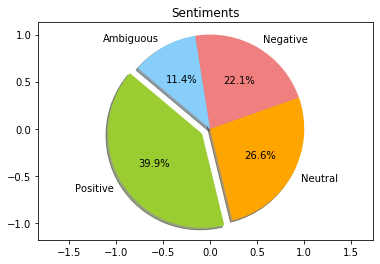

In [ ]:
# Create list as variables for pie chart to dispay proportions of sentiments
sentiment_list = ["Positive", "Neutral", "Negative", "Ambiguous"]
sentiment_tally = [82938, 55298, 45991, 23587]
colors = ["yellowgreen", "orange", "lightcoral", "lightskyblue"]
explode = (0.1, 0, 0, 0)

# Create a pie chart using matplotlib based on the above data
sentiment_count = dfClean['Sentiment'].value_counts()
print("The rated emotions and their corresponding sentiments are as follows:\n", 
"--------------------------------------------------","\n",
sentiment_count)
plt.pie(sentiment_count, explode=explode, labels=sentiment_list, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, frame=True)
plt.title("Sentiments")
plt.axis("equal")
plt.savefig("/Users/mdcummings/Desktop/Data Analysis/Boot Camp/Project 1/SentimentsPie.png")
plt.show()



In [ ]:
# Adding another column to display the emotion chosen by the rater
emo_map_yin = [
    (dfClean['amusement'] == 1),
    (dfClean['excitement'] == 1),
    (dfClean['joy'] == 1),
    (dfClean['love'] == 1),
    (dfClean['desire'] == 1),
    (dfClean['optimism'] == 1),
    (dfClean['caring'] == 1),
    (dfClean['pride'] == 1),
    (dfClean['admiration'] == 1),
    (dfClean['gratitude'] == 1),
    (dfClean['relief'] == 1),
    (dfClean['approval'] == 1),
    (dfClean['realization'] == 1),
    (dfClean['surprise'] == 1),
    (dfClean['curiosity'] == 1),
    (dfClean['confusion'] == 1),
    (dfClean['fear'] == 1),
    (dfClean['nervousness'] == 1),
    (dfClean['remorse'] == 1),
    (dfClean['embarrassment'] == 1),
    (dfClean['disappointment'] == 1),
    (dfClean['sadness'] == 1),
    (dfClean['grief'] == 1),
    (dfClean['disgust'] == 1),
    (dfClean['anger'] == 1),
    (dfClean['annoyance'] == 1),
    (dfClean['disapproval'] == 1),
    (dfClean['neutral'] == 1)
]

emo_map_yang = ['Amusement', 'Excitement', 'Joy', 'Love', 'Desire', 'Optimism', 'Caring',
              'Pride', 'Admiration', 'Gratitude', 'Relief', 'Approval',
               'Realization', 'Surprise','Curiosity','Confusion',
               'Fear', 'Nervousness', 'Remorse', 'Embarrassment', 'Disappointment', 'Sadness', 'Grief',
               'Disgust', 'Anger', 'Annoyance', 'Disapproval', 'Neutral']
dfClean['Emotion'] = np.select(emo_map_yin, emo_map_yang)
dfClean.head()

,text,subreddit,created_utc,rater_id,admiration,amusement,anger,annoyance,approval,caring,...,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,Sentiment,Emotion
0,That game hurt.,nrl,2019-01-25 01:50:39,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,Negative,Sadness
2,"You do right, if you don't care then fuck 'em!",confessions,2019-01-02 11:15:44,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Neutral,Neutral
3,Man I love reddit.,facepalm,2019-01-20 06:17:34,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Love
4,"[NAME] was nowhere near them, he was by the Fa...",starwarsspeculation,2019-01-05 06:10:01,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Neutral,Neutral
5,Right? Considering it’s such an important docu...,TrueReddit,2019-01-23 21:50:08,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Gratitude


In [ ]:
# Find the number of ratings for all emotions rated (including neutral ratings)
emotion_count = dfClean['Emotion'].value_counts()
# emotion_count = pd.DataFrame(emotion_count)
emotion_count.head(40)



Neutral           55298
Admiration        14046
Approval          13333
Amusement          9245
Annoyance          9174
Gratitude          8726
Disapproval        7686
Optimism           7516
Curiosity          7356
Love               7329
Joy                6816
Disappointment     6544
Realization        6468
Anger              6450
Confusion          5527
Excitement         5464
Caring             5023
Sadness            4250
Surprise           4236
Disgust            3998
Desire             3454
Fear               2639
Remorse            1952
Embarrassment      1880
Nervousness        1046
Pride              1018
Relief              968
Grief               372
Name: Emotion, dtype: int64

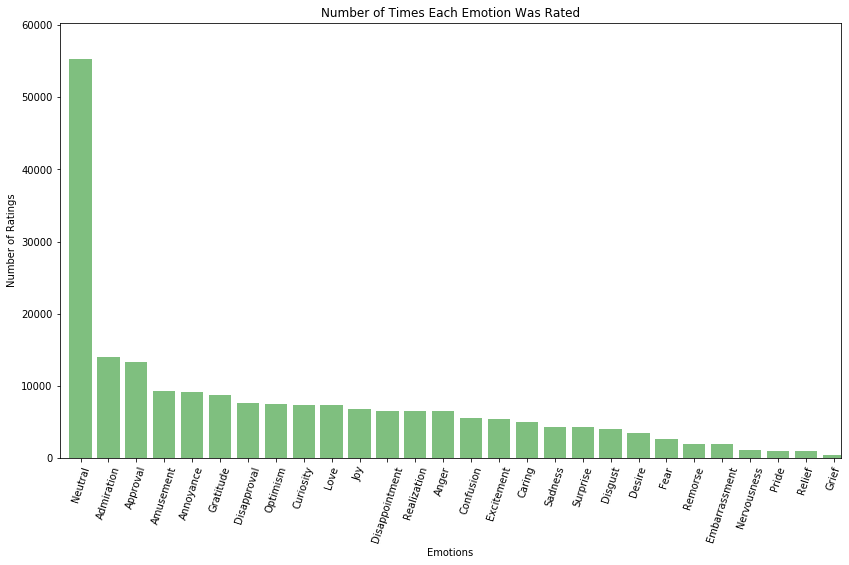

In [ ]:
# Situate the 'emotion_count' dataframe into a bar chart
x_axis = np.arange(len(emotion_count)) 
fig, ax = plt.subplots(figsize=(14,8))
plt.bar(x_axis, emotion_count, color='g', alpha=0.5, align="center")
plt.xlim(-0.75, len(x_axis)-0.75)
plt.ylim(0, max(emotion_count)+5000)
plt.title("Number of Times Each Emotion Was Rated")
plt.xlabel("Emotions")
plt.ylabel("Number of Ratings")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Neutral', 'Admiration', 'Approval', 'Amusement', 'Annoyance', 'Gratitude', 'Disapproval',
              'Optimism', 'Curiosity', 'Love', 'Joy', 'Disappointment',
               'Realization', 'Anger','Confusion','Excitement',
               'Caring', 'Sadness', 'Surprise', 'Disgust', 'Desire', 'Fear', 'Remorse',
               'Embarrassment', 'Nervousness', 'Pride', 'Relief', 'Grief'])
plt.xticks(rotation = 72)
plt.show()

In [ ]:
# Find the number of Neutral ratings per subreddit

subreddit_sentiments = dfClean[["text", "subreddit", "Sentiment"]]
subreddit_sentiments

,text,subreddit,Sentiment
0,That game hurt.,nrl,Negative
2,"You do right, if you don't care then fuck 'em!",confessions,Neutral
3,Man I love reddit.,facepalm,Positive
4,"[NAME] was nowhere near them, he was by the Fa...",starwarsspeculation,Neutral
5,Right? Considering it’s such an important docu...,TrueReddit,Positive
...,...,...,...
211219,"Well, I'm glad you're out of all that now. How...",raisedbynarcissists,Positive
211220,Everyone likes [NAME].,heroesofthestorm,Positive
211221,Well when you’ve imported about a gazillion of...,nottheonion,Positive
211222,That looks amazing,shittyfoodporn,Positive


In [ ]:
# CODE FROM ALDO ### CODE FROM ALDO ###
# Importing "CountsSubredditCat.csv" into a DataFrame, check pathing for errors!
SubredditCatDF = pd.read_csv("/Users/mdcummings/Desktop/Data Analysis/Boot Camp/Project 1/CountsSubredditCat.csv")

# Clean by dropping columns and renaming
SubredditCatClean = SubredditCatDF.drop(columns = ['Subscribers', 'Responses','Notes', '77', 'Discussion', '"General" discussion'])
SubredditCatClean.rename(columns={"Subreddit": "subreddit"}, inplace=True)
SubredditCatClean.head(50)

,subreddit,Grouping
0,cringe,emotive
1,loveafterlockup,television movie
2,socialanxiety,discussion
3,AnimalsBeingBros,emotive
4,OkCupid,relationship
5,TheSimpsons,television movie
6,vanderpumprules,television movie
7,90DayFiance,television movie
8,confessions,discussion
9,90dayfianceuncensored,television movie


In [ ]:
# CODE FROM ALDO ### CODE FROM ALDO ###
# Merge cleaned catDataFrame into main DataFrame
dfCleanStaging = dfClean.merge(SubredditCatClean)

# Dropping Emotion matrix as we have their emotion listed under "Emotion" column.
dfCleanStagingA = dfCleanStaging.drop(columns = ['amusement', 'excitement', 'joy', 'love', 'desire', 'optimism', 'caring',\
                                                'pride', 'admiration', 'gratitude', 'relief', 'approval',\
                                                'realization', 'surprise','curiosity','confusion',\
                                                'fear', 'nervousness', 'remorse', 'embarrassment', 'disappointment', 'sadness', 'grief',\
                                                'disgust', 'anger', 'annoyance', 'disapproval', 'neutral'])

# Rearranging columns by placing subreddit next to subgroup
dfCleanStagingB = dfCleanStagingA[['text', 'subreddit', 'Grouping', 'created_utc', 'rater_id', 'Sentiment', 'Emotion']]

# Renaming titles for readability
dfCleanStagingB.rename(columns = {"text":"Text", "subreddit": "Subreddit", "Grouping":"Group", "created_utc":"UTC", "rater_id":"Rater ID"}, inplace=True)
dfCleanStagingB.head(50)

,Text,Subreddit,Group,UTC,Rater ID,Sentiment,Emotion
0,That game hurt.,nrl,sports,2019-01-25 01:50:39,1,Negative,Sadness
1,My fans on patreon will be rewarded soon,nrl,sports,2019-01-29 07:24:40,33,Neutral,Neutral
2,Lets see how [NAME] goes in Round 6,nrl,sports,2019-01-15 23:34:30,49,Neutral,Neutral
3,Apparently lots,nrl,sports,2019-01-30 21:48:09,35,Neutral,Neutral
4,Support the Sydney ~~Blues~~ Sixers. Loved tha...,nrl,sports,2019-01-16 23:15:46,18,Positive,Excitement
5,"Yeah, obviously. But that the joke relies on c...",nrl,sports,2019-01-21 10:03:17,24,Positive,Approval
6,maybe post the article since it's already out lol,nrl,sports,2019-01-31 06:04:45,26,Positive,Amusement
7,*Unfortunately that’s the world we live in now...,nrl,sports,2019-01-09 01:19:25,36,Neutral,Neutral
8,its ok i understood,nrl,sports,2019-01-16 04:49:09,37,Positive,Approval
9,That's the longest dimple I've ever seen>,nrl,sports,2019-01-05 00:50:28,55,Positive,Amusement


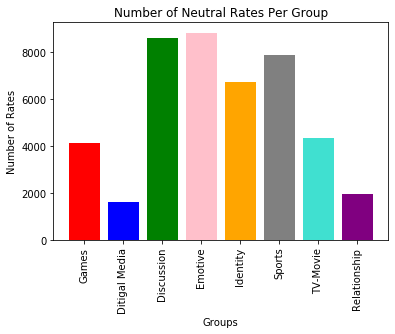

In [ ]:
# Establishing a variable from the groups that rated neutral
dfCS_neu_games= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='games')]
dfCS_neu_sports= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='sports')]
dfCS_neu_emotive= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='emotive')]
dfCS_neu_tv_movie= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='television movie')]
dfCS_neu_disc= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='discussion')]
dfCS_neu_relation= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='relationship')]
dfCS_neu_identity= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='identity')]
dfCS_neu_dig_media= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='digital media')]

# Converting the variables into integers from their length
neutral_games_df = len(dfCS_neu_games)
neutral_sports_df = len(dfCS_neu_sports)
neutral_emotive_df = len(dfCS_neu_emotive)
neutral_tv_movie_df = len(dfCS_neu_tv_movie)
neutral_discuss_df = len(dfCS_neu_disc)
neutral_relation_df = len(dfCS_neu_relation)
neutral_identity_df = len(dfCS_neu_identity)
neutral_dig_media_df = len(dfCS_neu_dig_media)

# Creating a dictionary from the amount of Neutral ratings from each group along with a list for the colors of each bar
neutral_list = {'Games': neutral_games_df, 'Ditigal Media': neutral_dig_media_df, 'Discussion': neutral_discuss_df,
                'Emotive': neutral_emotive_df, 'Identity': neutral_identity_df, 'Sports': neutral_sports_df,
                'TV-Movie': neutral_tv_movie_df, 'Relationship': neutral_relation_df}
colors = ['red', 'blue', 'green', 'pink', 'orange', 'grey', 'turquoise', 'purple']

# Creating a bar chart representing the amount of neutral ratings each group received 
plt.bar(range(len(neutral_list)), list(neutral_list.values()), color=colors, align='center')
plt.xticks(range(len(neutral_list)), list(neutral_list.keys()), rotation='vertical')
plt.title("Number of Neutral Rates Per Group")
plt.xlabel("Groups")
plt.ylabel("Number of Rates")

plt.show()







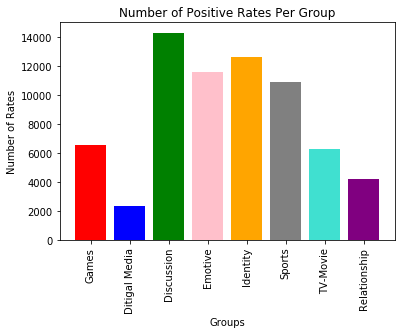

In [ ]:
# Establishing a variable from the groups that rated Positive
dfCS_pos_games= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='games')]
dfCS_pos_sports= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='sports')]
dfCS_pos_emotive= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='emotive')]
dfCS_pos_tv_movie= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='television movie')]
dfCS_pos_disc= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='discussion')]
dfCS_pos_relation= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='relationship')]
dfCS_pos_identity= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='identity')]
dfCS_pos_dig_media= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='digital media')]

# Converting the variables into integers from their length
pos_games_df = len(dfCS_pos_games)
pos_sports_df = len(dfCS_pos_sports)
pos_emotive_df = len(dfCS_pos_emotive)
pos_tv_movie_df = len(dfCS_pos_tv_movie)
pos_discuss_df = len(dfCS_pos_disc)
pos_relation_df = len(dfCS_pos_relation)
pos_identity_df = len(dfCS_pos_identity)
pos_dig_media_df = len(dfCS_pos_dig_media)

# Creating a dictionary from the amount of Positive ratings from each group along with a list for the colors of each bar
positive_list = {'Games': pos_games_df, 'Ditigal Media': pos_dig_media_df, 'Discussion': pos_discuss_df,
                'Emotive': pos_emotive_df, 'Identity': pos_identity_df, 'Sports': pos_sports_df,
                'TV-Movie': pos_tv_movie_df, 'Relationship': pos_relation_df}
colors = ['red', 'blue', 'green', 'pink', 'orange', 'grey', 'turquoise', 'purple']

# Creating a bar chart representing the amount of neutral ratings each group received 
plt.bar(range(len(positive_list)), list(positive_list.values()), color=colors, align='center')
plt.xticks(range(len(positive_list)), list(positive_list.keys()), rotation='vertical')
plt.title("Number of Positive Rates Per Group")
plt.xlabel("Groups")
plt.ylabel("Number of Rates")

plt.show()

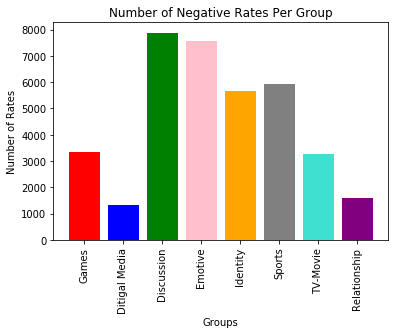

In [ ]:
# Establishing a variable from the groups that rated Negative
dfCS_neg_games= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='games')]
dfCS_neg_sports= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='sports')]
dfCS_neg_emotive= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='emotive')]
dfCS_neg_tv_movie= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='television movie')]
dfCS_neg_disc= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='discussion')]
dfCS_neg_relation= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='relationship')]
dfCS_neg_identity= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='identity')]
dfCS_neg_dig_media= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='digital media')]

# Converting the variables into integers from their length
neg_games_df = len(dfCS_neg_games)
neg_sports_df = len(dfCS_neg_sports)
neg_emotive_df = len(dfCS_neg_emotive)
neg_tv_movie_df = len(dfCS_neg_tv_movie)
neg_discuss_df = len(dfCS_neg_disc)
neg_relation_df = len(dfCS_neg_relation)
neg_identity_df = len(dfCS_neg_identity)
neg_dig_media_df = len(dfCS_neg_dig_media)

# Creating a dictionary from the amount of Positive ratings from each group along with a list for the colors of each bar
negative_list = {'Games': neg_games_df, 'Ditigal Media': neg_dig_media_df, 'Discussion': neg_discuss_df,
                'Emotive': neg_emotive_df, 'Identity': neg_identity_df, 'Sports': neg_sports_df,
                'TV-Movie': neg_tv_movie_df, 'Relationship': neg_relation_df}
colors = ['red', 'blue', 'green', 'pink', 'orange', 'grey', 'turquoise', 'purple']

# Creating a bar chart representing the amount of Positive ratings each group received 
plt.bar(range(len(negative_list)), list(negative_list.values()), color=colors, align='center')
plt.xticks(range(len(negative_list)), list(negative_list.keys()), rotation='vertical')
plt.title("Number of Negative Rates Per Group")
plt.xlabel("Groups")
plt.ylabel("Number of Rates")

plt.show()

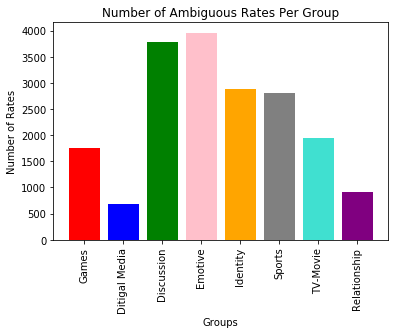

In [ ]:
# Establishing a variable from the groups that rated Ambiguous
dfCS_amb_games= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='games')]
dfCS_amb_sports= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='sports')]
dfCS_amb_emotive= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='emotive')]
dfCS_amb_tv_movie= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='television movie')]
dfCS_amb_disc= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='discussion')]
dfCS_amb_relation= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='relationship')]
dfCS_amb_identity= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='identity')]
dfCS_amb_dig_media= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='digital media')]

# Converting the variables into integers from their length
amb_games_df = len(dfCS_amb_games)
amb_sports_df = len(dfCS_amb_sports)
amb_emotive_df = len(dfCS_amb_emotive)
amb_tv_movie_df = len(dfCS_amb_tv_movie)
amb_discuss_df = len(dfCS_amb_disc)
amb_relation_df = len(dfCS_amb_relation)
amb_identity_df = len(dfCS_amb_identity)
amb_dig_media_df = len(dfCS_amb_dig_media)

# Creating a dictionary from the amount of Ambiguous ratings from each group along with a list for the colors of each bar
ambiguous_list = {'Games': amb_games_df, 'Ditigal Media': amb_dig_media_df, 'Discussion': amb_discuss_df,
                'Emotive': amb_emotive_df, 'Identity': amb_identity_df, 'Sports': amb_sports_df,
                'TV-Movie': amb_tv_movie_df, 'Relationship': amb_relation_df}
colors = ['red', 'blue', 'green', 'pink', 'orange', 'grey', 'turquoise', 'purple']

# Creating a bar chart representing the amount of Ambiguous ratings each group received 
plt.bar(range(len(ambiguous_list)), list(ambiguous_list.values()), color=colors, align='center')
plt.xticks(range(len(ambiguous_list)), list(ambiguous_list.keys()), rotation='vertical')
plt.title("Number of Ambiguous Rates Per Group")
plt.xlabel("Groups")
plt.ylabel("Number of Rates")

plt.show()

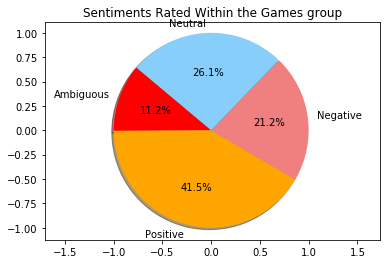

In [ ]:
# Pie chart showing the breakdown of sentiments from the ratings for the group Games
amb_games_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='games')]
pos_games_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='games')]
neg_games_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='games')]
neu_games_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='games')]

#Getting the length to see how many ratings each has
amb_clean_count = len(amb_games_clean)
pos_clean_count = len(pos_games_clean)
neg_clean_count = len(neg_games_clean)
neu_clean_count = len(neu_games_clean)

# Establishing labels for the sections of the pie chart
labels = ["Ambiguous", "Positive", "Negative", "Neutral"]

# Colors of each slice
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# The values of each section of the pie chart
sizes = [amb_clean_count, pos_clean_count, neg_clean_count, neu_clean_count]

# Create pie chart based on above values
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, frame=True)
plt.title("Sentiments Rated Within the Games group")
plt.axis("equal")
plt.show()




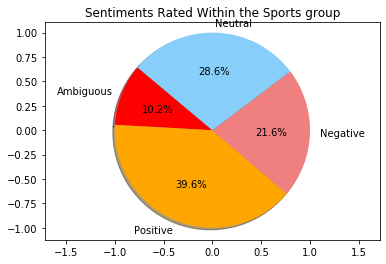

In [ ]:
# Pie chart showing the breakdown of sentiments from the ratings for the group Sports
amb_sports_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='sports')]
pos_sports_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='sports')]
neg_sports_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='sports')]
neu_sports_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='sports')]

#Getting the length to see how many ratings each has
amb_sports_count = len(amb_sports_clean)
pos_sports_count = len(pos_sports_clean)
neg_sports_count = len(neg_sports_clean)
neu_sports_count = len(neu_sports_clean)

# Establishing labels for the sections of the pie chart
labels = ["Ambiguous", "Positive", "Negative", "Neutral"]

# Colors of each slice
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# The values of each section of the pie chart
sizes = [amb_sports_count, pos_sports_count, neg_sports_count, neu_sports_count]

# Create pie chart based on above values
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, frame=True)
plt.title("Sentiments Rated Within the Sports group")
plt.axis("equal")
plt.show()

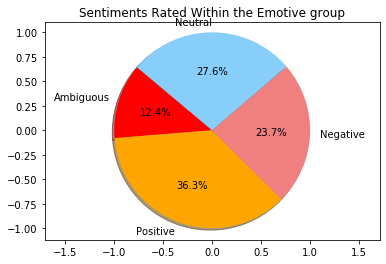

In [ ]:
# Pie chart showing the breakdown of sentiments from the ratings for the group Emotive
amb_emotive_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='emotive')]
pos_emotive_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='emotive')]
neg_emotive_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='emotive')]
neu_emotive_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='emotive')]

#Getting the length to see how many ratings each has
amb_emo_count = len(amb_emotive_clean)
pos_emo_count = len(pos_emotive_clean)
neg_emo_count = len(neg_emotive_clean)
neu_emo_count = len(neu_emotive_clean)

# Establishing labels for the sections of the pie chart
labels = ["Ambiguous", "Positive", "Negative", "Neutral"]

# Colors of each slice
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# The values of each section of the pie chart
sizes = [amb_emo_count, pos_emo_count, neg_emo_count, neu_emo_count]

# Create pie chart based on above values
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, frame=True)
plt.title("Sentiments Rated Within the Emotive group")
plt.axis("equal")
plt.show()

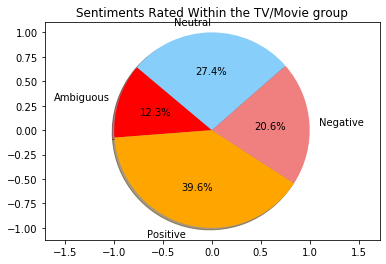

In [ ]:
# Pie chart showing the breakdown of sentiments from the ratings for the group Television/Movie
amb_tv_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='television movie')]
pos_tv_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='television movie')]
neg_tv_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='television movie')]
neu_tv_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='television movie')]

#Getting the length to see how many ratings each has
amb_tv_count = len(amb_tv_clean)
pos_tv_count = len(pos_tv_clean)
neg_tv_count = len(neg_tv_clean)
neu_tv_count = len(neu_tv_clean)

# Establishing labels for the sections of the pie chart
labels = ["Ambiguous", "Positive", "Negative", "Neutral"]

# Colors of each slice
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# The values of each section of the pie chart
sizes = [amb_tv_count, pos_tv_count, neg_tv_count, neu_tv_count]

# Create pie chart based on above values
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, frame=True)
plt.title("Sentiments Rated Within the TV/Movie group")
plt.axis("equal")
plt.show()

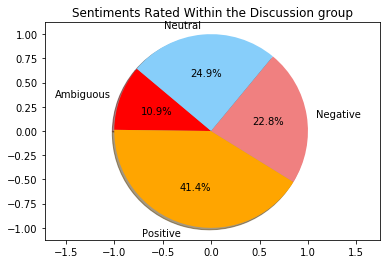

In [ ]:
# Pie chart showing the breakdown of sentiments from the ratings for the group Discussion
amb_disc_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='discussion')]
pos_disc_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='discussion')]
neg_disc_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='discussion')]
neu_disc_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='discussion')]

#Getting the length to see how many ratings each has
amb_disc_count = len(amb_disc_clean)
pos_disc_count = len(pos_disc_clean)
neg_disc_count = len(neg_disc_clean)
neu_disc_count = len(neu_disc_clean)

# Establishing labels for the sections of the pie chart
labels = ["Ambiguous", "Positive", "Negative", "Neutral"]

# Colors of each slice
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# The values of each section of the pie chart
sizes = [amb_disc_count, pos_disc_count, neg_disc_count, neu_disc_count]

# Create pie chart based on above values
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, frame=True)
plt.title("Sentiments Rated Within the Discussion group")
plt.axis("equal")
plt.show()

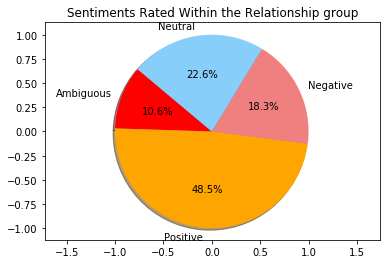

In [ ]:
# Pie chart showing the breakdown of sentiments from the ratings for the group Relationship
amb_rel_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='relationship')]
pos_rel_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='relationship')]
neg_rel_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='relationship')]
neu_rel_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='relationship')]

#Getting the length to see how many ratings each has
amb_rel_count = len(amb_rel_clean)
pos_rel_count = len(pos_rel_clean)
neg_rel_count = len(neg_rel_clean)
neu_rel_count = len(neu_rel_clean)

# Establishing labels for the sections of the pie chart
labels = ["Ambiguous", "Positive", "Negative", "Neutral"]

# Colors of each slice
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# The values of each section of the pie chart
sizes = [amb_rel_count, pos_rel_count, neg_rel_count, neu_rel_count]

# Create pie chart based on above values
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, frame=True)
plt.title("Sentiments Rated Within the Relationship group")
plt.axis("equal")
plt.show()

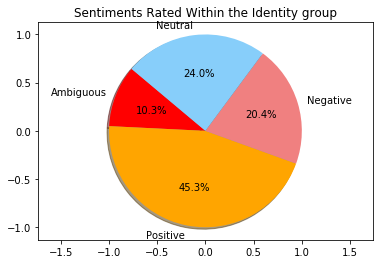

In [ ]:
# Pie chart showing the breakdown of sentiments from the ratings for the group Identity
amb_id_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='identity')]
pos_id_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='identity')]
neg_id_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='identity')]
neu_id_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='identity')]

#Getting the length to see how many ratings each has
amb_id_count = len(amb_id_clean)
pos_id_count = len(pos_id_clean)
neg_id_count = len(neg_id_clean)
neu_id_count = len(neu_id_clean)

# Establishing labels for the sections of the pie chart
labels = ["Ambiguous", "Positive", "Negative", "Neutral"]

# Colors of each slice
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# The values of each section of the pie chart
sizes = [amb_id_count, pos_id_count, neg_id_count, neu_id_count]

# Create pie chart based on above values
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, frame=True)
plt.title("Sentiments Rated Within the Identity group")
plt.axis("equal")
plt.show()

In [ ]:
# Pie chart showing the breakdown of sentiments from the ratings for the group Digital Media
amb_dm_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='digital media')]
pos_dm_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='digital media')]
neg_dm_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='digital media')]
neu_dm_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='digital media')]

#Getting the length to see how many ratings each has
amb_dm_count = len(amb_dm_clean)
pos_dm_count = len(pos_dm_clean)
neg_dm_count = len(neg_dm_clean)
neu_dm_count = len(neu_dm_clean)

# Establishing labels for the sections of the pie chart
labels = ["Ambiguous", "Positive", "Negative", "Neutral"]

# Colors of each slice
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# The values of each section of the pie chart
sizes = [amb_dm_count, pos_dm_count, neg_dm_count, neu_dm_count]

# Create pie chart based on above values
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, frame=True)
plt.title("Sentiments Rated Within the Digital Media group")
plt.axis("equal")
plt.show()

NameError: name 'dfCleanStagingB' is not defined